In [65]:
import scipy
import pandas as pd
import numpy as np
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from matplotlib import colors as mcolors

df = pd.read_csv('imdb_top_1000.csv')
df = df.drop_duplicates(subset="Series_Title", keep=False)

print(df)

                                           Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title  Released_Year Certificate  Runtime  \
0    The Shawshank Redemption           1994           A  142 min   
1               The Godfather           1972           A  175 min   
2             The Dark Knight           2008          UA  152 min   
3      The Godfather: Part 

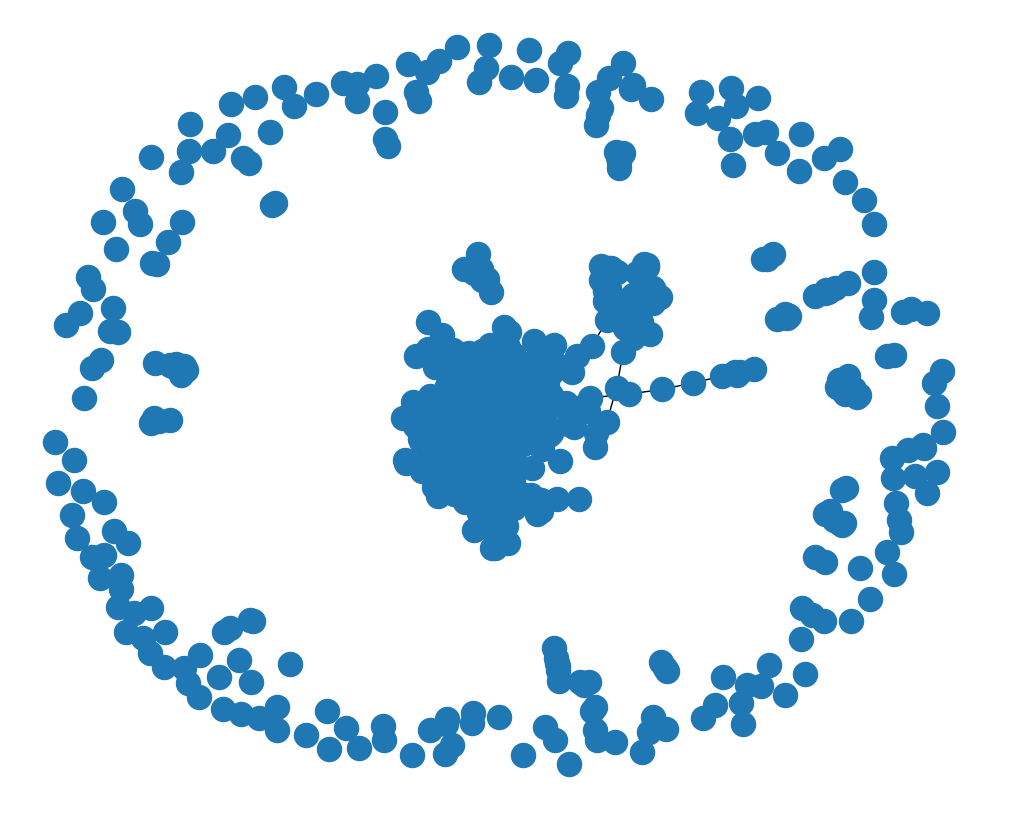

In [56]:
rows = []
G = nx.Graph()

# rows [series name, star actors, release year]
for index, row in df.iterrows():
    rows.append((row["Series_Title"], [row["Star1"], row["Star2"], row["Star3"], row["Star4"]], row["Released_Year"]))
    G.add_node(row["Series_Title"], genre=row["Genre"])


titles = [movie[0] for movie in rows]   

for i in range(len(titles)):
    for j in range(i+1, len(titles)):
        weight = len(set(rows[i][1]).intersection(set(rows[j][1])))
        if weight >= 1:
            G.add_edge(rows[i][0], rows[j][0], weight=weight)

plt.figure(figsize=(10, 8))  # Optional: Adjust the size of the figure
nx.draw(G)

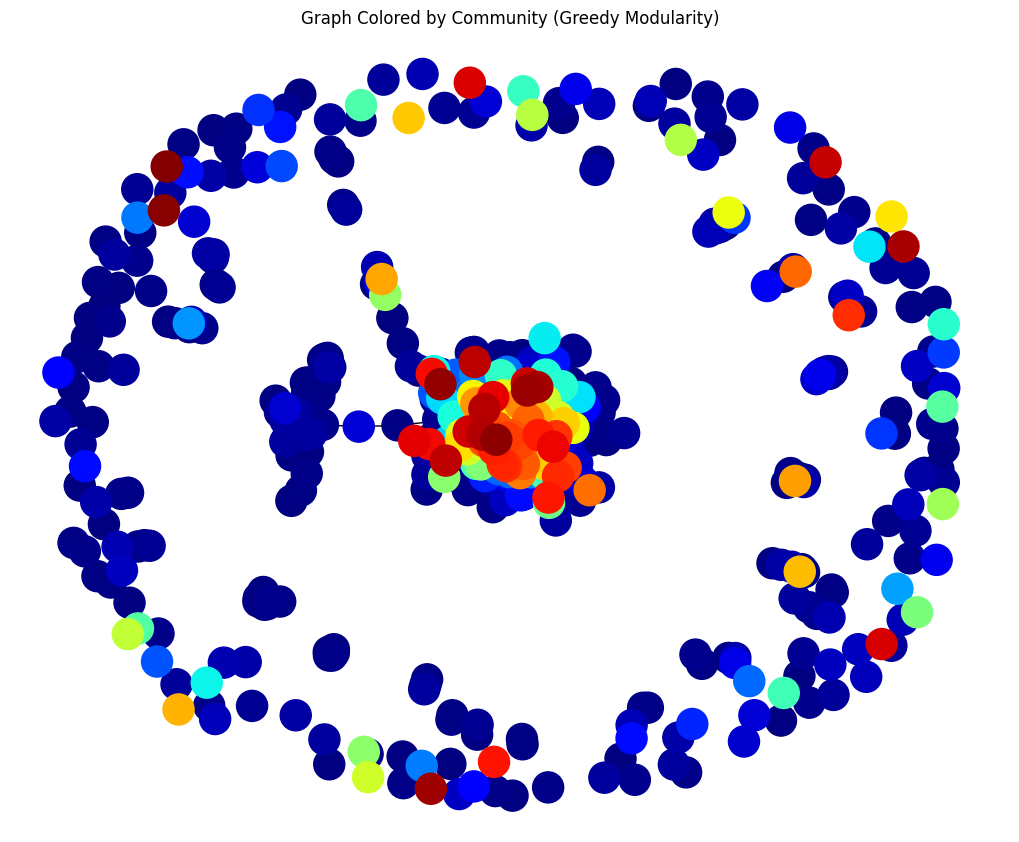

In [113]:
communities = list(nx.community.greedy_modularity_communities(G))

colors = []
for i , community in enumerate(communities):
    for node in community:
        colors.append(i)


plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)

node_colors = [plt.cm.jet(c / len(communities)) for c in colors]

nx.draw(G, pos, node_color=node_colors, node_size=500, font_size=10, font_weight='bold')
plt.title("Graph Colored by Community (Greedy Modularity)")
plt.show()

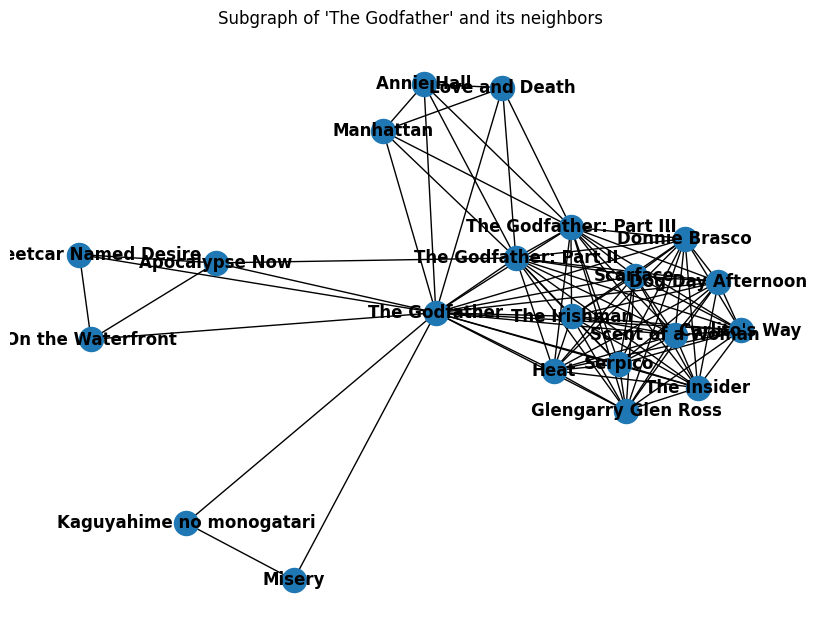

In [108]:
specific_node = 'The Godfather'

neighbors = list(G.neighbors(specific_node))

subgraph_nodes = [specific_node] + neighbors
subgraph = G.subgraph(subgraph_nodes)

plt.figure(figsize=(8, 6))
nx.draw(subgraph, with_labels=True, font_weight='bold')
plt.title(f"Subgraph of '{specific_node}' and its neighbors")
plt.show()


In [21]:
ccs = nx.closeness_centrality(G)
closeness_centarlity = sorted(ccs.items(), key=lambda movie: movie[1], reverse=True)

for movie in closeness_centarlity:
    print(movie)

('Sleepers', 0.19181027756345723)
('The Big Short', 0.19063649256756857)
('Inside Man', 0.18968057892288875)
('The Insider', 0.1895448018442038)
('The Prestige', 0.1885997779033851)
('The Man Who Would Be King', 0.187067529619465)
('A Beautiful Mind', 0.1865403932203964)
('The Departed', 0.18601621930196888)
('Children of Men', 0.1853651299799459)
('The Dark Knight Rises', 0.1853002716419543)
('The Godfather: Part II', 0.18504129152784957)
('Batman Begins', 0.18465417585519714)
("Ocean's Eleven", 0.18452549698700538)
('Good Will Hunting', 0.1840765298410516)
('Heat', 0.1837571743069762)
('American Gangster', 0.1835660923232948)
('The Bourne Identity', 0.1833119336631033)
('Ford v Ferrari', 0.1832485039282718)
('3:10 to Yuma', 0.18318511807426685)
('The Girl with the Dragon Tattoo', 0.1826796055028304)
('Catch Me If You Can', 0.18261661253541567)
('The Fighter', 0.18261661253541567)
('The Untouchables', 0.1823022982281258)
('The Irishman', 0.18198906403873039)
('Shutter Island', 0.18186

In [22]:
ccs = nx.betweenness_centrality(G)
closeness_centarlity = sorted(ccs.items(), key=lambda movie: movie[1], reverse=True)

for movie in closeness_centarlity:
    print(movie)

('Lion', 0.08386119939696242)
('Slumdog Millionaire', 0.07799349953668622)
('Barfi!', 0.07676335620086713)
('Rockstar', 0.07552919278878721)
('Airlift', 0.07439969014783639)
('The Girl with the Dragon Tattoo', 0.04280981564026153)
('Her', 0.03430807264508597)
('JFK', 0.02255357414200461)
('The Lunchbox', 0.021805004582495124)
('Charade', 0.02122112616297587)
('Inside Man', 0.020782035074410687)
('The Insider', 0.019167937001080753)
('The Prestige', 0.01868077336134424)
('Magnolia', 0.01846399130335057)
('Dogville', 0.017534527479801124)
('Good Will Hunting', 0.017223884536374447)
('Hera Pheri', 0.01672948209853515)
('The Dark Knight Rises', 0.015980881661369052)
('Baby', 0.015751688535722)
('The Lion in Winter', 0.015636808471486567)
('Sleepers', 0.015351024189308254)
('The Philadelphia Story', 0.015291953234582973)
('Sabrina', 0.015271784296580526)
('Unforgiven', 0.015222718949909843)
('Donnie Brasco', 0.015188268626208578)
('The Big Short', 0.014703500966199557)
('Catch Me If You Can

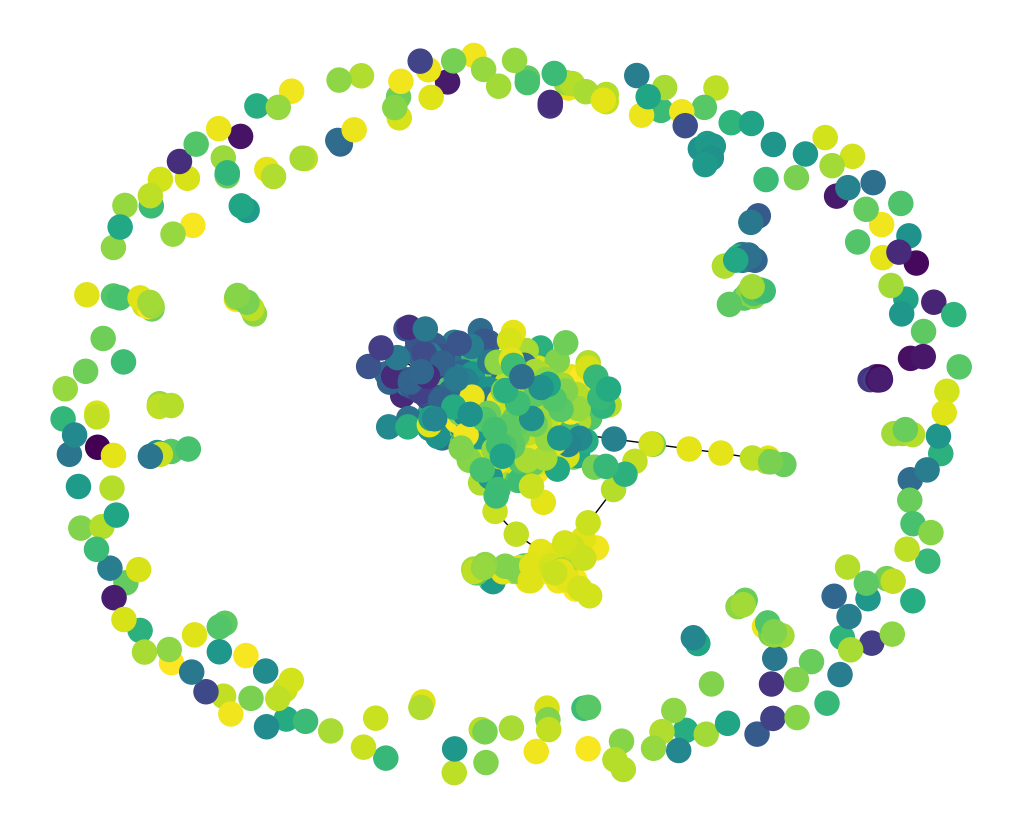

In [70]:
# Darker colours = Newer Movies
# Lighter colours = Older Movies

release_years = []
for row in rows:
    release_years.append(row[2])

year_max = max(release_years)
year_min = min(release_years)

norm = plt.Normalize(year_min, year_max)
cmap = cm.get_cmap('viridis')

node_colors = [cmap(norm(year)) for year in release_years]

plt.figure(figsize=(10, 8))  # Optional: Adjust the size of the figure
nx.draw(G, node_color=node_colors)

{'genre': 'Action, Adventure, Fantasy'}


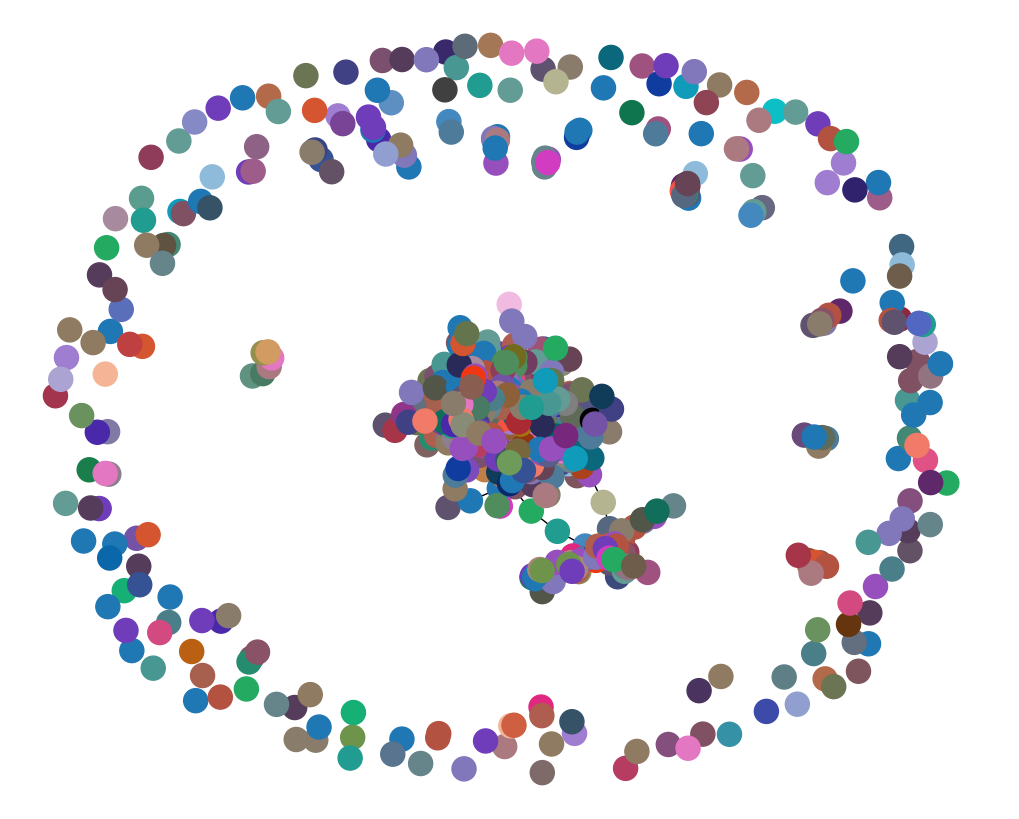

In [67]:
genre_colors = {
    "Drama": 'tab:blue',
    "Crime": 'tab:orange',
    "Action": 'r',
    "Adventure": 'tab:green',
    "Biography": 'tab:red',
    "History": 'tab:brown',
    "Sci-Fi": 'c',
    "Romance": 'm',
    "Western": 'y',
    "Fantasy": 'tab:purple',
    "Comedy": 'tab:pink',
    "Thriller": 'tab:gray',
    "Animation": 'tab:cyan',
    "Family": 'tab:green',
    "War": 'darkred',
    "Mystery": 'darkblue',
    "Music": 'w',
    "Horror": 'k',
    "Musical": 'orange',
    "Film-Noir": 'tab:gray',
    "Sport": 'darkgreen'
}

def blend_colors(genres):
    # Convert genre colors to RGBA (including transparency)
    genres = genres.split(", ")
    colors = [mcolors.to_rgba(genre_colors[genre]) for genre in genres]
    # Average the colors (blend them)
    avg_color = np.mean(colors, axis=0)
    return avg_color

print(G.nodes["Star Wars"])
node_colors = [blend_colors(G.nodes[node]['genre']) for node in G.nodes]

plt.figure(figsize=(10, 8))
nx.draw(G, node_color=node_colors)

# Display the plot
plt.show()


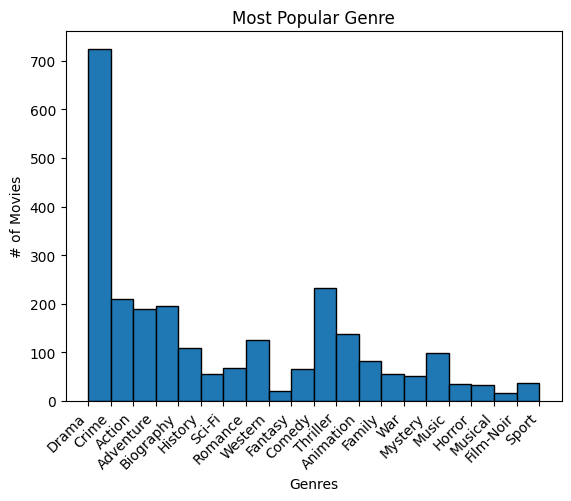

In [35]:
movie_by_genre = []

for index, row in df.iterrows():
    genres = row["Genre"].split(", ")
    title = row["Series_Title"]
    for genre in genres:
        movie_by_genre.append(genre)

plt.hist(movie_by_genre, bins=20, edgecolor="k")
plt.title("Most Popular Genre")
plt.xlabel("Genres")
plt.ylabel("# of Movies")
plt.xticks(rotation=45, ha='right')
plt.show()